In [101]:
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt
import keras
import pickle
import numpy as np

In [2]:
def open_file(filename):
    file = open(filename, "rb")
    models = pickle.load(file)
    file.close()
    return models

In [3]:
flowers_data = open_file('Output/Flowers_data_aug_grey.pckl')
flowers_label = open_file('Output/Flowers_aug_label.pckl')
flowers_label_encoded = open_file('Output/Flowers_aug_label_encoded.pckl')
label = to_categorical(flowers_label_encoded)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(flowers_data, label, test_size = 0.2, random_state = 128)

In [89]:
inputDim = len(x_train[0])
outputDim = len(y_train[0])

In [90]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [91]:
model = Sequential()
model.add(Conv2D(8, kernel_size = 3, activation = 'relu', input_shape=(250,300,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(outputDim, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 248, 298, 8)       80        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 124, 149, 8)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 122, 147, 16)      1168      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 120, 145, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 60, 72, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 58, 70, 64)        18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 259840)            0         
__________

In [92]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy','mse'])
cnn_model = model.fit(x_train, y_train, epochs = 50, batch_size = 128)

Epoch 1/50
797/797 [==============================] - 67s 84ms/step - loss: 2.2357 - acc: 0.2083 - mean_squared_error: 0.1858
Epoch 2/50
797/797 [==============================] - 67s 84ms/step - loss: 1.5921 - acc: 0.2196 - mean_squared_error: 0.1586
Epoch 3/50
797/797 [==============================] - 72s 90ms/step - loss: 1.5493 - acc: 0.2622 - mean_squared_error: 0.1553
Epoch 4/50
797/797 [==============================] - 73s 92ms/step - loss: 1.5208 - acc: 0.3099 - mean_squared_error: 0.1528
Epoch 5/50
797/797 [==============================] - 70s 87ms/step - loss: 1.4594 - acc: 0.3639 - mean_squared_error: 0.1475
Epoch 6/50
797/797 [==============================] - 63s 79ms/step - loss: 1.3566 - acc: 0.4479 - mean_squared_error: 0.1383
Epoch 7/50
797/797 [==============================] - 63s 79ms/step - loss: 1.2103 - acc: 0.5245 - mean_squared_error: 0.1256
Epoch 8/50
797/797 [==============================] - 65s 81ms/step - loss: 1.9777 - acc: 0.3112 - mean_squared_error:

dict_keys(['loss', 'acc', 'mean_squared_error'])


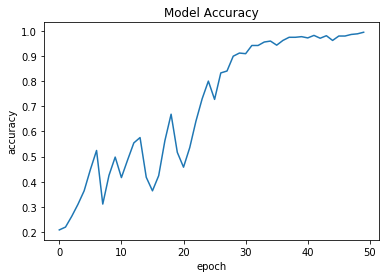

In [106]:
print(cnn_model.history.keys())
plt.plot(cnn_model.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

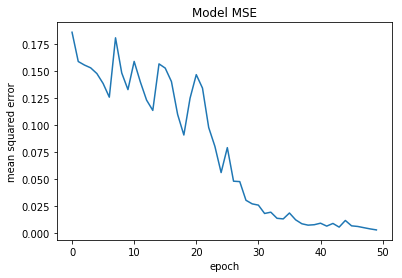

In [110]:
plt.plot(cnn_model.history['mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.show()

In [93]:
y_prob = model.predict(x_test)
Y_pred = y_prob.argmax(axis=-1)
Y_test = y_test.argmax(axis=-1)

In [95]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        30
           1       0.71      0.67      0.69        43
           2       0.50      0.70      0.58        46
           3       0.76      0.83      0.79        35
           4       0.90      0.41      0.57        46

   micro avg       0.67      0.67      0.67       200
   macro avg       0.71      0.68      0.67       200
weighted avg       0.71      0.67      0.66       200



In [97]:
print(confusion_matrix(Y_test, Y_pred))

[[24  1  4  0  1]
 [ 3 29  7  4  0]
 [ 3  6 32  4  1]
 [ 0  3  3 29  0]
 [ 6  2 18  1 19]]


In [98]:
print(accuracy_score(Y_test, Y_pred))

0.665


In [111]:
model.save_weights("Output/CNN_model.h5")